# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for python_version>"3.7" from https://files.pythonhosted.org/packages/a8/e3/06841b7e2b5dab99f6e5ece60db926ce35b9cf351da87ecaf2d75e5d9009/python_version-0.0.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 262.6 kB/s eta 0:02:27
   ---------------------------------------- 0.0/38.6 MB 262.6 kB/s eta 0:02:27
   ---------------------------------------- 0.0/38.6 MB 196.9 kB/s eta 0:03:16
   ----

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Lenovo\AppData\Local\Temp\pip-install-5n9vc9xk\tensorflow-gpu_39831fe3a95a4d79baaa2f8dac2bced8\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not bui

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
aniso8601                    9.0.1
anyio                        3.7.1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bidict                       0.22.1
bleach                       6.0.0
cachetools                   5.3.1
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.1.0
click                        8.1.3
colorama                     0.4.6
comm                         0.1.4
comtypes                     1.1.14
configparser                 6.0.0
contourpy                    1.0.7
cycler                       0.11.0


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import tensorflow as tf
import os

In [23]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [24]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [12]:
import cv2
import imghdr

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14140\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [26]:
data_dir = 'data' 

In [27]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [28]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [30]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [31]:
data_iterator = data.as_numpy_iterator()

In [32]:
batch = data_iterator.next()

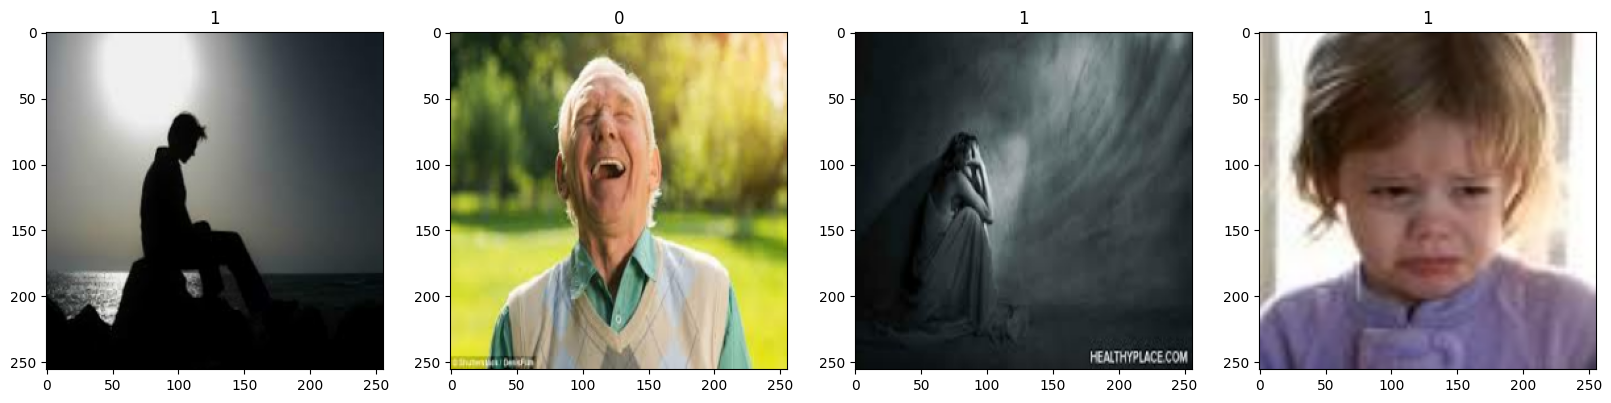

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [34]:
data = data.map(lambda x,y: (x/255, y))

In [35]:
data.as_numpy_iterator().next()

(array([[[[0.45490196, 0.40784314, 0.3137255 ],
          [0.45536152, 0.4083027 , 0.31418505],
          [0.45882353, 0.4117647 , 0.31764707],
          ...,
          [0.45490196, 0.43529412, 0.32156864],
          [0.45490196, 0.43529412, 0.32156864],
          [0.45490196, 0.43529412, 0.32156864]],
 
         [[0.45490196, 0.40784314, 0.3137255 ],
          [0.45536152, 0.4083027 , 0.31418505],
          [0.45882353, 0.4117647 , 0.31764707],
          ...,
          [0.45714614, 0.4375383 , 0.3238128 ],
          [0.45714614, 0.4375383 , 0.3238128 ],
          [0.45714614, 0.4375383 , 0.3238128 ]],
 
         [[0.45490196, 0.40784314, 0.3137255 ],
          [0.45536152, 0.4083027 , 0.31418505],
          [0.45882353, 0.4117647 , 0.31764707],
          ...,
          [0.45972955, 0.43830967, 0.3254902 ],
          [0.45994943, 0.43808976, 0.3254902 ],
          [0.45994943, 0.43808976, 0.3254902 ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 5. Split Data

In [37]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [39]:
train_size

7

In [40]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [41]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [46]:
logdir='logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 12s 1s/step - loss: 1.7006 - accuracy: 0.5223 - val_loss: 0.6977 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 8s 993ms/step - loss: 0.6761 - accuracy: 0.6116 - val_loss: 0.6394 - val_accuracy: 0.6719
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.6364 - accuracy: 0.6250 - val_loss: 0.6176 - val_accuracy: 0.8906
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.5748 - accuracy: 0.7589 - val_loss: 0.5117 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.4892 - accuracy: 0.7812 - val_loss: 0.4517 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.3989 - accuracy: 0.8661 - val_loss: 0.4635 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.3374 - accuracy: 0.9062 - val_loss: 0.3065 - val_accuracy: 0.9531
Epoch 8/20
7/7 [====================

# 8. Plot Performance

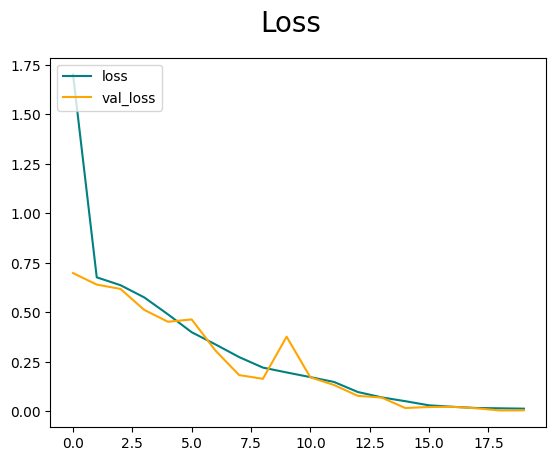

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

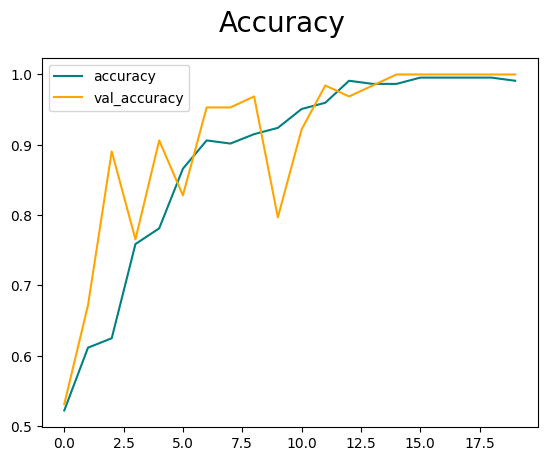

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [6]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 358ms/step


In [55]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [56]:
pip install opencv-python



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import cv2

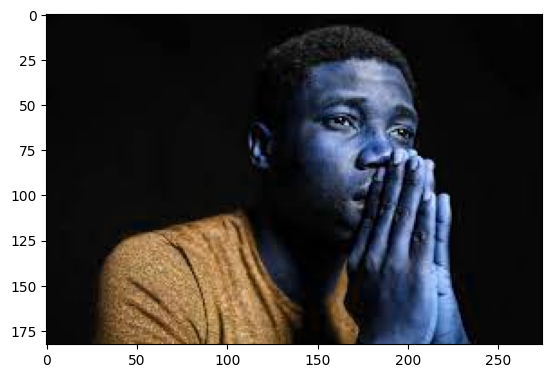

In [72]:
img = cv2.imread('SadPerson.jpg')
plt.imshow(img)
plt.show()

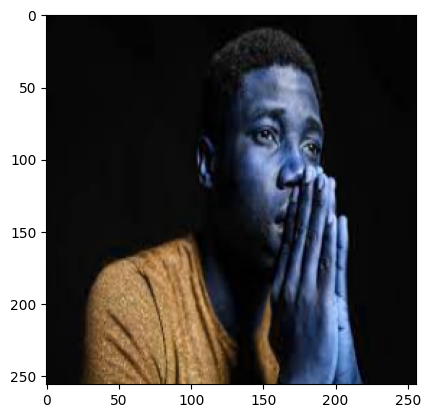

In [73]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [74]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [75]:
yhat

array([[1.]], dtype=float32)

In [62]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [4]:
from tensorflow.keras.models import load_model

In [8]:
model.save(os.path.join('models','happysadclassifier.h5'))

NameError: name 'model' is not defined

In [9]:
new_model = load_model('C:/Users/Lenovo/Documents/Model/HappySadClassifer/models/happysadclassifier.h5')

In [10]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'np' is not defined

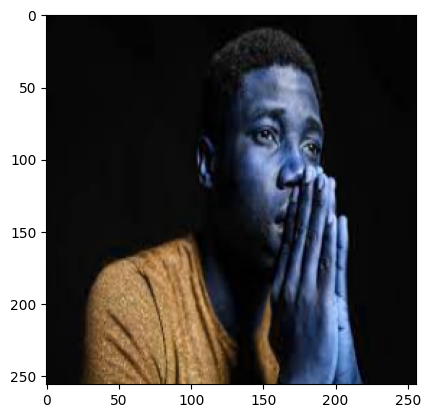

1/1 [==============================] - 0s 33ms/step


In [22]:
img = cv2.imread('SadPerson.jpg')
plt.imshow(img)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = new_model.predict(np.expand_dims(resize/255, 0))


In [23]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


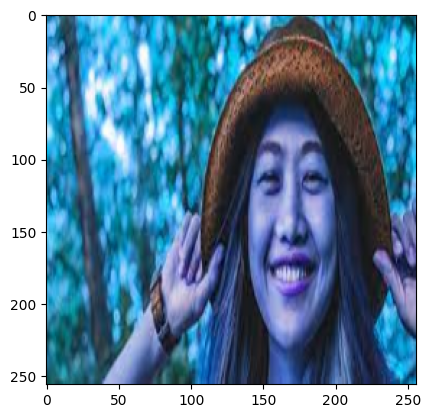

1/1 [==============================] - 0s 46ms/step


In [24]:
img = cv2.imread('HappyPerson.jpg')
plt.imshow(img)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = new_model.predict(np.expand_dims(resize/255, 0))


In [25]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
